In [30]:
### Regressions Ridge et Lasso avec le package glmnet
### 25 septembre 2019
### Jeremy L Hour

library("MASS")
library("glmnet")

# load user-defined functions
source("functions/DataSim.R") 

# 1. Simulate data
n = 2000
data = DataSim(n, p=20, Ry= .2, Intercept=F)
ytrain = data$y[1:(n/2)]; Xtrain = data$X[1:(n/2),]
ytest  = data$y[-(1:(n/2))]; Xtest = data$X[-(1:(n/2)),]

Warning message in cst * gamma:
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in cst * b:
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”

[1] "Nombre de coefficients nuls:  0"


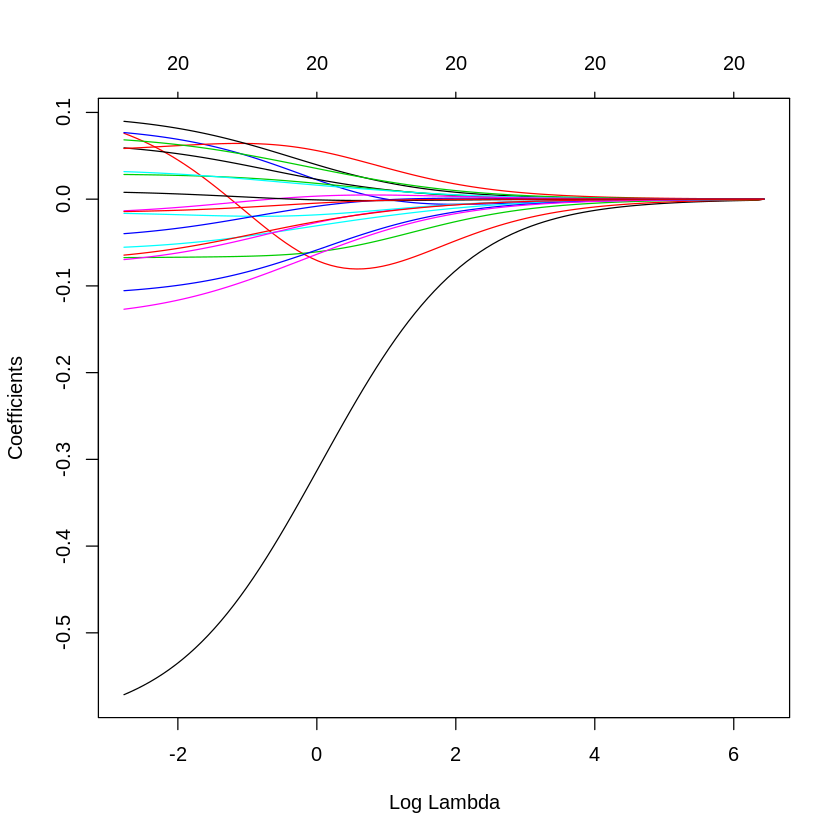

In [29]:
### 2. Estimateurs

### A. MCO
bMCO = solve(t(X)%*%X)%*%(t(X)%*%y)

# calcul de l'erreur sur le jeu de test

### B. Ridge regression (alpha=0)
Ridge = glmnet(X,y, family="gaussian",alpha=0)

# Ridge$beta est une matrice où chaque colonne collecte l'estimateur Ridge pour une valeur donnee de lambda
# Prenons une valeur arbitraire
bRidge = c(Ridge$beta[,6])
print(paste("Nombre de coefficients nuls: ",sum(bRidge == 0)))
# aucun coefficient n'est strictement nul
# le package glmnet permet de visualiser la trajectoire des coefficients a mesure que lambda croit
plot(Ridge, xvar="lambda")

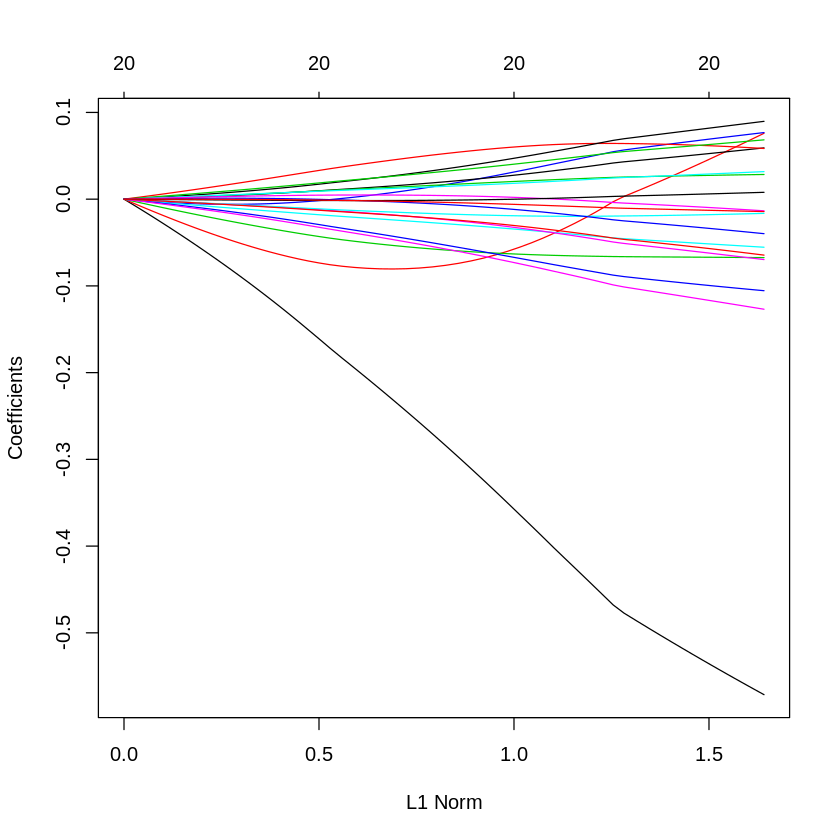